<a href="https://colab.research.google.com/github/julia-nosralla/trabalho-ce2-python/blob/main/Trabalho_CE2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

O Airbnb transformou a forma como pessoas buscam e oferecem acomodações temporárias, impactando tanto o setor de turismo quanto o mercado imobiliário em grandes cidades. Este trabalho tem como objetivo analisar dados reais da plataforma, com foco específico na cidade de Barcelona, uma das principais capitais turísticas da Europa. Utilizando a linguagem Python, serão aplicadas técnicas de análise estatística, visualização de dados e modelagem preditiva, incluindo a construção de um modelo de regressão linear simples. Através dessa abordagem, busca-se entender os principais fatores que influenciam o preço das hospedagens e oferecer uma visão clara sobre a dinâmica do mercado de aluguel por temporada na cidade.

# Desenvolvimento

Inicialmente, é necessário obter uma visão geral das variáveis presentes no banco.

### Primeiras 5 linhas do banco:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

banco = pd.read_csv('Barcelona.csv')

banco.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia Maria,Eixample,la Sagrada Família,41.405560,2.17262,Entire home/apt,179.0,1,45,2024-09-16,0.31,29,147,5,HUTB-002062
1,23197,"Forum CCIB DeLuxe, Spacious, Large Balcony, relax",90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.412432,2.21975,Entire home/apt,251.0,3,82,2025-01-03,0.48,1,0,8,HUTB005057
2,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.17015,Entire home/apt,104.0,1,143,2025-03-04,0.86,3,107,31,HUTB-001722
3,34241,Stylish Top Floor Apartment - Ramblas Plaza Real,73163,Andres,Ciutat Vella,el Barri Gòtic,41.380620,2.17517,Entire home/apt,157.0,31,25,2024-11-05,0.14,3,327,15,Exempt
4,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,Andres,Ciutat Vella,el Barri Gòtic,41.379780,2.17623,Entire home/apt,401.0,5,256,2025-02-02,1.46,3,191,34,HUTB-150671



### Últimas 5 linhas do banco:

In [ ]:
banco.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
19417,1366108822123777508,Habitacion Privada,413160011,Loucie And John,Gràcia,la Vila de Gràcia,41.399074,2.159820,Private room,27.0,31,0,NaN,NaN,8,348,0,Exempt
19418,1366453124999573764,Cozy Double Room in City Center,534870364,Juan,Eixample,la Dreta de l'Eixample,41.391440,2.176490,Private room,60.0,1,0,NaN,NaN,6,1,0,Exempt
19419,1366459989694212599,140. Poble Sec Ent Apartment,396363,Alcam Apartments,Sants-Montjuïc,el Poble Sec,41.371550,2.159870,Entire home/apt,103.0,33,0,NaN,NaN,75,359,0,NaN
19420,1366500461965716620,Big Room with Work Desk - RDL0520003,518888520,David,Eixample,la Dreta de l'Eixample,41.392220,2.168250,Private room,31.0,32,0,NaN,NaN,98,278,0,NaN
19421,1366501139971684620,Your Boutique Mediterranean Stay in Barcelona,124887626,Ana,Eixample,la Sagrada Família,41.404897,2.180792,Entire home/apt,307.0,2,1,2025-03-05,1.0,1,51,1,HUTB-003778



### Nomes das colunas, valores nulos e tipos de dados:

In [ ]:
banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19422 entries, 0 to 19421
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              19422 non-null  int64  
 1   name                            19422 non-null  object 
 2   host_id                         19422 non-null  int64  
 3   host_name                       19415 non-null  object 
 4   neighbourhood_group             19422 non-null  object 
 5   neighbourhood                   19422 non-null  object 
 6   latitude                        19422 non-null  float64
 7   longitude                       19422 non-null  float64
 8   room_type                       19422 non-null  object 
 9   price                           15273 non-null  float64
 10  minimum_nights                  19422 non-null  int64  
 11  number_of_reviews               19422 non-null  int64  
 12  last_review                     

Com base nessas informações, obtêm-se uma noção preliminar dos dados a serem analisados. Primeiramente, o banco conta com 19422 linhas e 18 colunas. As variáveis observadas estão descritas a seguir:

|Variável     |Descrição         |Tipo           |
|-------------|------------------|---------------|
|`id`| Identificador único do anúncio | Categórica|
|`name`| Nome (título) do anúncio | Categórica |
|`host_id`| Identificador único do anfitrião | Categórica|
|`host_name`| Nome do anfitrião| Categórica |
|`neighbourhood_group`| Agrupamento de bairros| Categórica |
|`neighbourhood`| Bairro ou região onde o imóvel está localizado|  Catagórica |
|`latitude`| Latitude da localização do imóvel| Numérica |
|`longitude`| Longitude da localização do imóvel | Numérica |
|`room_type`| Tipo de acomodação | Categórica |
|`price`| Preço da diária em euros | Numérica |
|`minimun_nights`| Número mínimo de noites exigidas para reserva | Numérica |
|`number_of_reviews`| Quantidade total de avaliações recebidas pelo anúncio |Numérica |
|`last_review`| Data da última avaliação recebida (se houver) | Data |
|`reviews_per_month`| Média de avaliações recebidas por mês | Numérica |
|`calculated_host_listings_count `| Número de anúncios ativos do mesmo anfitrião | Numérica |
|`availability_365`| Número de dias no ano em que o imóvel está disponível para reserva | Numérica |
|`number_of_reviews_ltm`| ??????????| Binária |
|`license`| ???????????? | Categórica |

Os tipos das variáveis `id` e `host_id`, que são lidas como interos, devem ser corrigidos para string, tendo em vista que são variáveis identificadoras.

In [ ]:
banco["id"] = banco["id"].astype(str)
banco["host_id"] = banco["host_id"].astype(str)

Em seguida, verifica-se a frequência absoluta e a porcentagem de valores nulos em cada coluna.

In [ ]:
banco.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,7
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,4149


In [ ]:

banco.isnull().mean() * 100

,0
id,0.000000
name,0.000000
host_id,0.000000
host_name,0.036042
neighbourhood_group,0.000000
neighbourhood,0.000000
latitude,0.000000
longitude,0.000000
room_type,0.000000
price,21.362373


As linhas com observações faltantes serão filtradas com base nas colunas que estiverem sendo utilizadas para análise.

A tabela a seguir fornece uma resumo das variáveis numéricas observadas:

In [ ]:
round(banco.describe(), 2)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,19422.00,19422.00,15273.00,19422.00,19422.00,14513.00,19422.00,19422.00,19422.00
mean,41.39,2.17,161.54,15.33,49.73,1.44,49.53,161.79,11.75
std,0.01,0.02,327.01,27.68,105.13,2.01,104.11,130.78,24.28
min,41.34,2.09,8.00,1.00,0.00,0.01,1.00,0.00,0.00
25%,41.38,2.16,65.00,1.00,0.00,0.20,2.00,1.00,0.00
50%,41.39,2.17,117.00,3.00,6.00,0.78,7.00,174.00,2.00
75%,41.40,2.18,181.00,31.00,48.00,2.18,34.00,280.00,15.00
max,41.46,2.22,10000.00,1124.00,3091.00,79.12,483.00,365.00,1239.00


Para o preço, que é a principal variável de interesse, foram observadas as seguintes medidas descritivas:

In [ ]:
print("Média:", round(banco["price"].mean(), 2))
print("Mediana:", round(banco["price"].median(), 2))
print("Desvio padrão:", round(banco["price"].std(), 2))
print("Valor mínimo:", round(banco["price"].min(), 2))
print("Valor máximo:", round(banco["price"].max(), 2))

Média: 161.54
Mediana: 117.0
Desvio padrão: 327.01
Valor mínimo: 8.0
Valor máximo: 10000.0


Ademais, os gráficos abaixo permitem uma visualização mais detalhada da distribuição dessa variável.

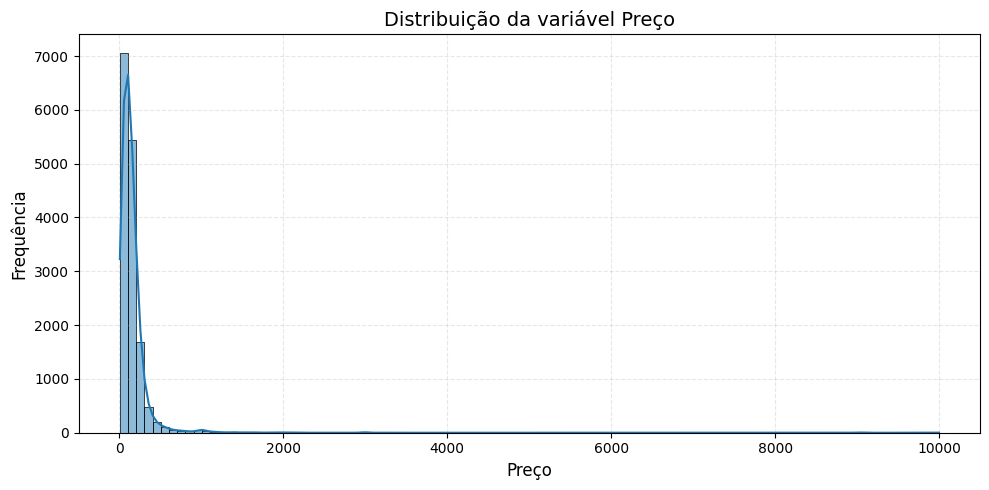

In [ ]:
banco1 = banco[banco['price'].notna()]

plt.figure(figsize=(10, 5))
sns.histplot(banco1['price'], bins=100, kde=True)
plt.title('Distribuição da variável Preço', fontsize=14)
plt.xlabel('Preço', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

O gráfico revela uma distribuição fortemente assimétrica à direita, característica comum em contextos econômicos, como preços de produtos ou serviços. O histograma mostra que a grande maioria dos dados está concentrada em valores baixos, abaixo de 1000 euros, enquanto uma pequena parcela de observações apresenta valores muito elevados, formando uma cauda longa à direita. Essa distribuição indica a presença de outliers que podem influenciar medidas como a média, tornando-a maior do que a mediana.

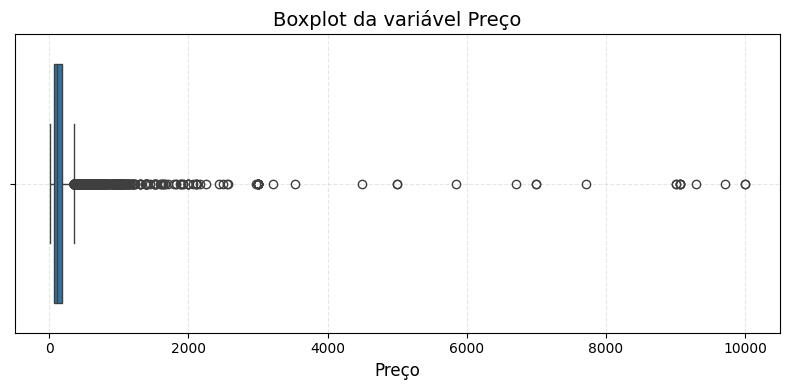

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=banco1['price'])
plt.title('Boxplot da variável Preço', fontsize=14)
plt.xlabel('Preço', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

O boxplot reforça o comportamento apresentado no histograma, evidenciando uma grande quantidade de valores atípicos acima do terceiro quartil. A mediana está situada próxima ao limite inferior da caixa, indicando que pelo menos 50% dos dados possuem preços relativamente baixos. Os muitos círculos acima da caixa representam observações fora do limite superior, confirmando a existência de uma cauda longa e uma alta dispersão nos dados. Os outliers detectados indicam que existe uma parcela pequena de hospedagens com preços extremamente elevados.